# Xray Structures


In [1]:
import os, sys
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl
from matplotlib.colors import LogNorm

mpl.rcParams['pdf.fonttype'] = 42

%matplotlib inline

## Constants

In [2]:
#############################
#                           #
#                           #
#        CONSTANTS          #
#                           #
#                           #
#############################
LOCAL_DIR = '.'
DATA_DIR = LOCAL_DIR+'/data'
OUTPUT_DIR = LOCAL_DIR+'/figures/xray_structures'
if not os.path.exists(OUTPUT_DIR): os.makedirs(OUTPUT_DIR)

PSIBLAST_DATA_SHEETNAME = 'psiblast_pdb_homologs'

COLORS = {
    'homologs': '#a3a3a3',
    '80.a': '#dec152',
    '80.b': '#67b3b3',
    '70.a': '#3481cd'
}

In [3]:
from importlib import reload
sys.path.append(LOCAL_DIR) #Helper Functions Here
import FramHelperScripts
reload(FramHelperScripts)
FHS = FramHelperScripts.FramHelperFunctions(DATA_DIR)

## Load Data

In [4]:
df = pd.read_excel(
    FHS.get_data_filename(), 
    sheet_name=PSIBLAST_DATA_SHEETNAME
)[[
    'id', 'chain', 'identity', 'rmsd', 'category'
]]

In [5]:
print('rmsd of the pdb entries - mean = {0:.3f}, median = {1:.3f}'.format(
    np.mean(df[df.category != 'design'].rmsd),
    np.median(df[df.category != 'design'].rmsd),
))

for idx, design in df[df.category == 'design'].iterrows():
    print(' - rmsd of {0} chain {1} = {2:.3f}'.format(
        design.id, design.chain, design.rmsd
    ))


rmsd of the pdb entries - mean = 0.589, median = 0.566
 - rmsd of 80.a chain A = 0.252
 - rmsd of 80.a chain B = 0.295
 - rmsd of 80.b chain A = 0.504
 - rmsd of 80.b chain B = 0.433
 - rmsd of 70.a chain A = 0.605
 - rmsd of 70.a chain B = 0.605


## Plotting

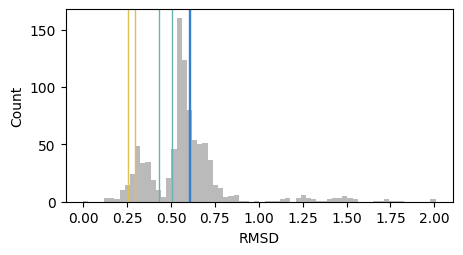

In [6]:
def plot_rmsd_histogram(output_filename=None):
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(5, 2.5)
    
    for idx, design in df[df.category == 'design'].iterrows():
        color = COLORS[design.id]
        dashes = (None, None)
        #if design.chain == 'B': dashes=(2,2)
        ax.axvline(
            x = design.rmsd, color = color, 
            linewidth=1, dashes=dashes,
            label='{0}.{1}'.format(design.id, design.chain),
        )

    sns.histplot(
        df[df.category != 'design'], x='rmsd',
        color=COLORS['homologs'], alpha=0.75, linewidth=0,
        label='homolog chains (n={0})'.format(
            len(df[df.category != 'design'])
        ),
        ax=ax,
    )
    ax.set_xlabel('RMSD')
    #ax.legend(fontsize=9)

    if output_filename:
        fig.savefig(output_filename)

plot_rmsd_histogram(output_filename=OUTPUT_DIR+'/rmsd_histogram.pdf')

In [7]:
def plot_rmsd_vs_seqid(square=False, output_filename=None):
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(20, 10)
    dot_sizes = [75, 250]
    if square: 
        fig.set_size_inches(12, 12)
        dot_sizes = [100, 200]

    plotting_df = df.copy()

    sns.scatterplot(
        data=plotting_df[plotting_df.category != 'design'], 
        x='identity', y='rmsd',
        color=COLORS['homologs'], 
        s=dot_sizes[0], alpha=0.5, linewidth=0,
        label='pdb homolog of WT TEM-1 ({0} chains in {1} pdb entries)'.format(
            len(plotting_df[plotting_df.category != 'design']),
            len(np.unique(plotting_df[plotting_df.category=='pdb_entry'].id))
        ),
        ax=ax
    )
    sns.scatterplot(
        data=plotting_df[(
            (plotting_df.category == 'design') &
            (plotting_df.id == '80.a')
        )], 
        x='identity', y='rmsd',
        s=dot_sizes[1], alpha=0.75, linewidth=1, 
        edgecolor='black', color=COLORS['80.a'],
        label='80.a design (2 chains)',
        ax=ax
    )
    sns.scatterplot(
        data=plotting_df[(
            (plotting_df.category == 'design') &
            (plotting_df.id == '80.b')
        )], 
        x='identity', y='rmsd',
        s=dot_sizes[1], alpha=0.75, linewidth=1, 
        edgecolor='black', color=COLORS['80.b'],
        label='80.b design (2 chains)',
        ax=ax
    )
    sns.scatterplot(
        data=plotting_df[(
            (plotting_df.category == 'design') &
            (plotting_df.id == '70.a')
        )], 
        x='identity', y='rmsd',
        s=dot_sizes[1], alpha=0.75, linewidth=1, 
        edgecolor='black', color=COLORS['70.a'],
        label='70.a design (2 chains)',
        ax=ax
    )

    ax.set_title('Structural deviation of designs from WT TEM-1 is similar to published\n'+
                'structures with similar sequence identity to WT TEM-1',
                fontsize=18)
    ax.set_ylabel('Root Mean Square Deviation (RMSD) to WT TEM-1 structure (PDB: 1XPB)', fontsize=14)
    ax.set_xlabel('Sequence identity to WT TEM-1', fontsize=14)
    ax.legend(fontsize=14)

    if output_filename:
        fig.savefig(output_filename)

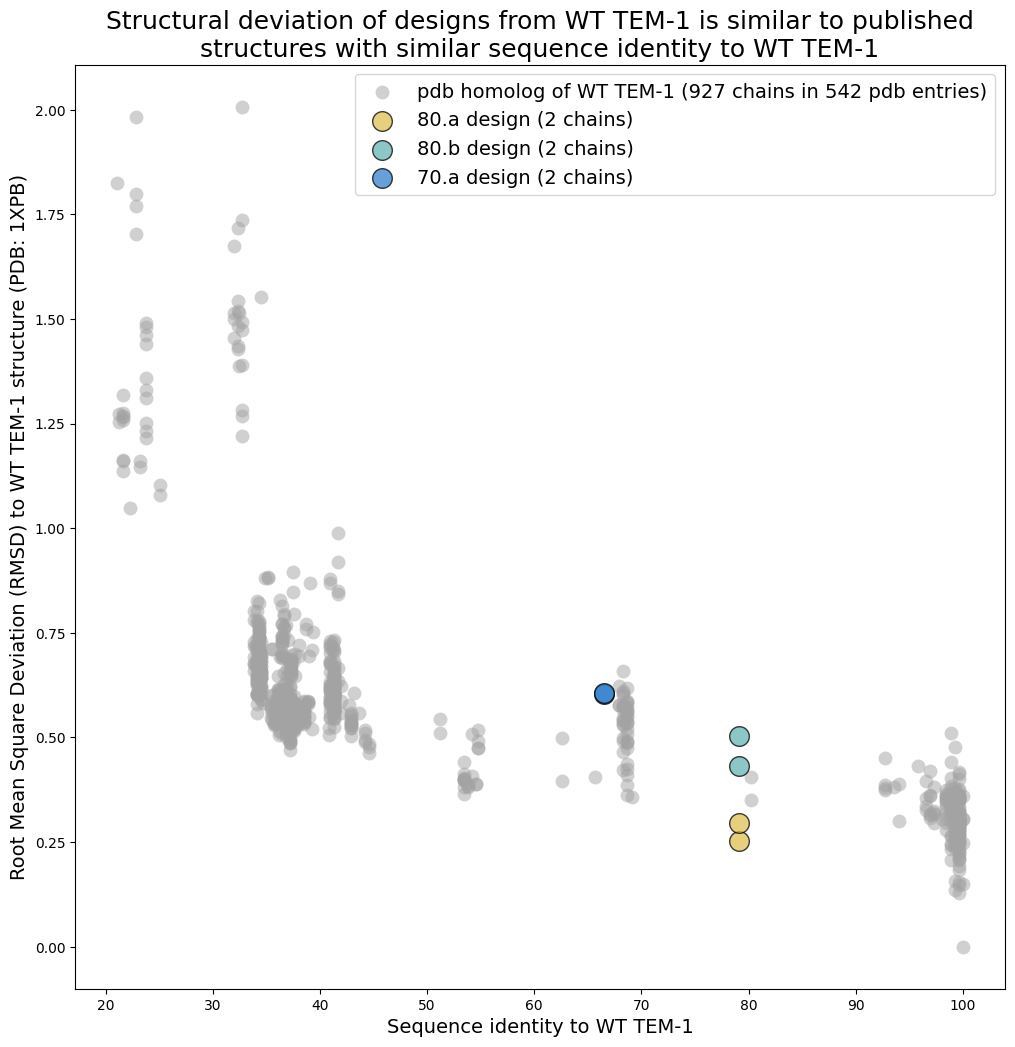

In [8]:
plot_rmsd_vs_seqid(square=True, output_filename=OUTPUT_DIR+'/rmsd_vs_identity.pdf')